In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df= pd.read_csv("/Users/mugzi/Downloads/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv")

In [4]:
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


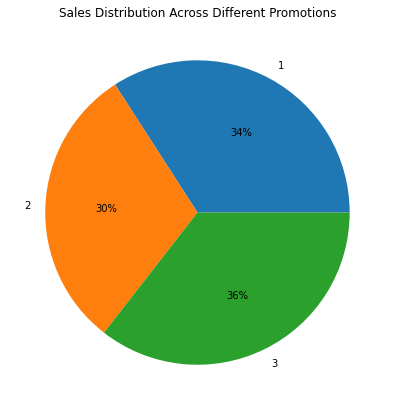

In [7]:
sales_by_promotion = df.groupby('Promotion')['SalesInThousands'].sum()
fig, ax = plt.subplots(figsize=(7, 7))
sales_by_promotion.plot.pie(autopct='%1.0f%%', ax=ax)
ax.set_ylabel('')
ax.set_title('Sales Distribution Across Different Promotions')
plt.show()



You can see from this data set promotion group 3 takes the largest portion however each promotion group takes about one third of the total sales 

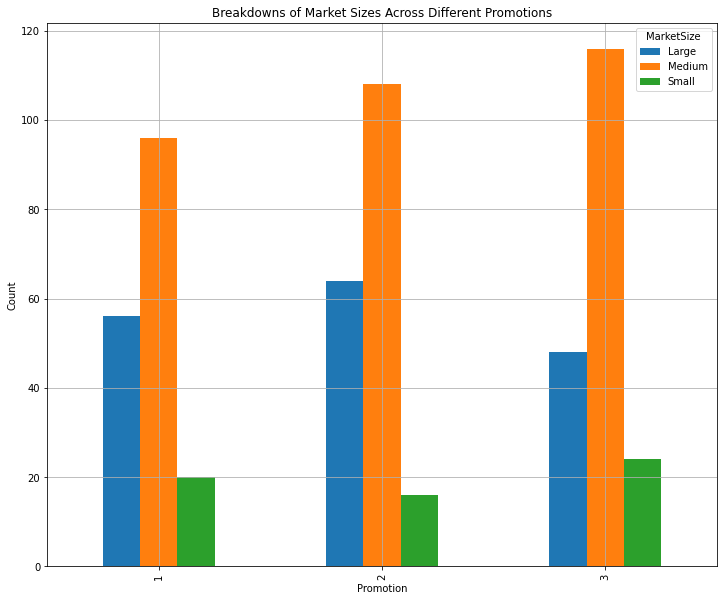

In [9]:

market_size_breakdown = df.groupby(['Promotion', 'MarketSize'])['MarketID'].count().unstack('MarketSize')

# Create a bar chart with specified settings
fig, ax = plt.subplots(figsize=(12, 10))
market_size_breakdown.plot(kind='bar', ax=ax, grid=True)
ax.set_ylabel('Count')
ax.set_title('Breakdowns of Market Sizes Across Different Promotions')

# Display the bar chart
plt.show()


As you can notice the medium market size occupies the most among the 3 promotions 

In [11]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


Similar Store Profiles: The fact that the average ages are close and that there's a concentration of stores within a specific age range (10-12 years) indicates that the three groups have similar store profiles. This is a positive sign because it suggests that the groups are well-matched in terms of the age of the stores, which is an important factor when conducting A/B testing.

Controlled Experiment: A well-controlled experiment is essential for meaningful A/B testing. Similar store profiles mean that potential confounding factors related to store age are minimized. This allows you to have more confidence that any differences in outcomes (e.g., sales or customer behavior) between the groups are likely due to the promotion being tested and not influenced by significant differences in store age.

A Strategy having a higher repsonse number doesnt necessarily mean that it out performs the rest.We shall evaluate the relative performance of different marketing strategies using the t-Test


Null Hypothesis: There is no difference in the two marketing strategies.

Alternative Hypothesis: There is a difference in the two marketing strategies.


In [14]:
import pandas as pd


# Separate the data for the two groups (Promotion 1 and Promotion 2)
sales_promotion_1 = df.loc[df['Promotion'] == 1, 'SalesInThousands'].values
sales_promotion_2 = df.loc[df['Promotion'] == 2, 'SalesInThousands'].values

# Perform an independent two-sample t-test with unequal variances
t_statistic, p_value = stats.ttest_ind(sales_promotion_1, sales_promotion_2, equal_var=False)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance (e.g., using a significance level of 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")


t-statistic: 6.42752867090748
P-value: 4.2903687179871785e-10
There is a statistically significant difference between the two groups.


In [15]:
# Separate the data for the two groups (Promotion 1 and Promotion 2)
sales_promotion_1 = df.loc[df['Promotion'] == 1, 'SalesInThousands'].values
sales_promotion_2 = df.loc[df['Promotion'] == 3, 'SalesInThousands'].values

# Perform an independent two-sample t-test with unequal variances
t_statistic, p_value = stats.ttest_ind(sales_promotion_1, sales_promotion_2, equal_var=False)

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Check for statistical significance (e.g., using a significance level of 0.05)
if p_value < 0.05:
    print("There is a statistically significant difference between the two groups.")
else:
    print("There is no statistically significant difference between the two groups.")

t-statistic: 1.5560224307758634
P-value: 0.12059147742229478
There is no statistically significant difference between the two groups.


We can conclude that promotion 1 outperforms promotion 2 , however promotion 1 and 3 are not different from each other. We could drop promotion 2 and keep working promotion 1 & 3 as part of our marketing strategies